<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

超越Hello World，一个计算机视觉示例

在之前的练习中，你了解了如何创建一个神经网络来解决你试图解决的问题。这给出了一个学习行为的明确例子。当然，在那个例子中，使用神经网络有点过度了，因为直接写出函数Y=2x-1会更简单，而不是麻烦地使用机器学习来学习X和Y之间在固定值集上的关系，并将其扩展到所有值。

但是，如果编写这样的规则更加困难呢？比如一个计算机视觉问题？让我们来看一个场景，我们可以从包含10种不同类型的数据集中训练，来识别不同的服装物品。

## Start Coding

Let's start with our import of TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

这些值看起来是什么样的？让我们打印一张训练图像和一个训练标签来看看……尝试数组中的不同索引。例如，也看看索引42……那是一双不同于索引0处的靴子。

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

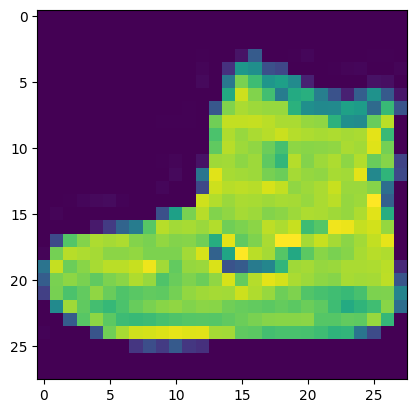

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
print(training_images[0])      # X[0]
print(training_labels[0])      # y[0]

import matplotlib.pyplot as plt
plt.imshow(training_images[0]) # X[0]

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

你会注意到，数字中的所有值都在0到255之间。如果我们正在训练一个神经网络，由于各种原因，如果我们把所有值都当作0到1之间的值来处理，这个过程称为“归一化”，那么会更容易……而且幸运的是，在Python中，像这样归一化一个列表而不需要循环是很容易的。你可以这样做：

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

现在你可能想知道为什么有两套数据……训练集和测试集——记得我们在介绍中提到过吗？这个想法是，用一套数据来训练，然后再用另一套模型尚未见过的数据……来看看它在分类值方面的表现如何。毕竟，当你完成后，你会想用它之前未见过的数据来试试看！

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

现在我们来设计模型。这里有很多新概念，但别担心，你会很快掌握的。

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),                            # 输入层：展平（转成一维）
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),    # 隐藏层
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # 输出层：10个类型

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

Sequential：它定义了神经网络中层的序列。

Flatten：记得之前我们打印图像时，图像是一个正方形吗？Flatten就是将这个正方形转换成一个一维集合。

Dense：添加一层神经元。

每一层神经元都需要一个激活函数来告诉它们该做什么。有很多选项，但现在只用这些。

Relu实际上意味着“如果X>0则返回X，否则返回0”——所以它的作用是只将0或更大的值传递给网络中的下一层。

Softmax接收一组值，并有效地选择最大的一个，所以，例如，如果最后一层的输出看起来像[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]，它就能帮你省去从中寻找最大值的麻烦，并将其转换为[0,0,0,0,1,0,0,0,0]——目标是节省大量编码工作！

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

现在模型已经定义好了，接下来要做的就是实际构建它。你像以前一样，用一个优化器和损失函数来编译它——然后通过调用model.fit来训练它，要求它将你的训练数据拟合到你的训练标签上——即让它找出训练数据与其实际标签之间的关系，这样将来如果你有看起来像训练数据的数据，它就可以预测出这些数据会是什么样子。

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7780 - loss: 0.6484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8615 - loss: 0.3935
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8735 - loss: 0.3403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8844 - loss: 0.3173
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8884 - loss: 0.3010


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

一旦训练完成——你应该在最后一个训练周期结束时看到一个准确率值。它可能看起来像是0.9098。这告诉你，你的神经网络在分类训练数据方面的准确率约为91%。也就是说，它找出了图像和标签之间91%有效的模式匹配。虽然不是很好，但考虑到它只训练了5个周期，而且速度相当快，所以也不算差。

但它对未见过的数据会怎么样呢？这就是为什么我们有测试图像。我们可以调用model.evaluate，并传入这两组数据，它将报告每一组的损失。我们来试试吧：

In [9]:
model.evaluate(test_images, test_labels) # 返回损失率和准确率

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8667 - loss: 0.3681


[0.3659392297267914, 0.869700014591217]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:

对我来说，返回的准确率大约是0.8838，这意味着准确率大约是88%。不出所料，它在处理未见过的数据时可能不会像在处理训练过的数据时那样表现良好！在学习这门课程的过程中，你将研究如何改进这一点。

为了进一步探索，请尝试以下练习：


# Exploration Exercises

探索练习

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

练习1：
对于这个第一个练习，运行下面的代码：它为每个测试图像创建一组分类，然后打印分类中的第一个条目。运行后，输出是一个数字列表。你认为为什么会这样，这些数字代表什么？

In [10]:
classifications = model.predict(test_images)

print(classifications[0]) # 返回第一张图片的预测结果

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[6.9023749e-06 9.9797383e-08 3.4071533e-07 3.3047766e-11 1.1828544e-06 2.1393653e-02 8.8651741e-06 2.7276684e-02 1.3846362e-06 9.5131087e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

提示：尝试运行print(test_labels[0])——你会得到一个9。这有助于你理解为什么这个列表看起来是这样吗？

In [11]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes

这个列表代表什么？
它是10个随机的无意义值
它是计算机做出的前10个分类
它表示这个项目属于这10个类别中的每一个的概率

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

答案：
正确答案是（3）

模型的输出是一个包含10个数字的列表。这些数字表示被分类的值是对应值（https://github.com/zalandoresearch/fashion-mnist#labels）的概率，即列表中的第一个值是图像为'0'（T恤/上衣）的概率，下一个是'1'（裤子）等等。注意，它们的概率都非常低。

对于9（踝靴），概率在90左右，即神经网络告诉我们它几乎肯定是一个7。

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
3.   The ankle boot is label 9, and there are 0->9 elements in the list

你怎么知道这个列表告诉你这个项目是短靴？
1. 没有足够的信息来回答这个问题
2. 列表中的第10个元素是最大的，而短靴被标记为9
3. 短靴被标记为9，列表中有0->9的元素


#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

答案
正确答案是（2）。列表和标签都是从0开始的，所以标记为9的短靴意味着它是10个类别中的第10个。列表中第10个元素的值最高，意味着神经网络预测它正在分类的物品最有可能是短靴。

## Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 

练习2:
现在让我们来看看你模型中的层。对包含512个神经元的密集层尝试不同的值。你在损失、训练时间等方面得到了什么不同的结果？你认为为什么会这样？


In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3092
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0755
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0489
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0210
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0887
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.3815427e-10 3.1229299e-09 1.5397571e-08 4.7907611e-07 2.9243581e-13 4.4034557e-10 4.4923189e-14 9.9999952e-01 8.4188301e-09 1.5435944e-08]
7


### Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate

问题1. 增加到1024个神经元——会有什么影响？
1. 训练时间更长，但更准确
2. 训练时间更长，但对准确性没有影响
3. 训练时间相同，但更准确


#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

答案
正确答案是（1）。通过增加更多的神经元，我们必须进行更多的计算，这会减慢处理速度，但在这种情况下，它们会产生良好的影响——我们会得到更准确的结果。这并不意味着“越多越好”，你很快就会遇到收益递减的规律！

## Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

练习3:
如果你移除Flatten()层会发生什么？你为什么认为会是这样？

你会得到一个关于数据形状的错误。现在可能看起来有些模糊，但这强化了一条经验法则，即你网络中的第一层应该与你的数据形状相同。现在我们的数据是28x28的图像，而28层每层28个神经元是不可行的，所以把28,28“压平”成784x1更有意义。与其我们自己编写所有代码来处理这个问题，不如在开始时添加Flatten()层，这样当数组稍后加载到模型中时，它们会自动为我们压平。

In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

## Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

练习4:
考虑最终的（输出）层。为什么有10个？如果你有不同的数量，比如不是10个，会发生什么？例如，试着用5个来训练网络。

一旦它发现一个意外的值，你就会得到一个错误。另一条经验法则是——最后一层的神经元数量应该与你正在分类的类别数量相匹配。在这种情况下，它是数字0-9，所以有10个，因此你的最后一层应该有10个神经元。

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\yeahe83\AppData\Local\Temp\ipykernel_9948\171206343.py", line 18, in <module>

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\trainers\trainer.py", line 357, in _compute_loss

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\trainers\trainer.py", line 325, in compute_loss

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\losses\losses.py", line 1853, in sparse_categorical_crossentropy

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "c:\Users\yeahe83\miniconda3\envs\xuyi\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 2 4 1 6 8 7 0 7 7 3 4 8 4 5 0 2 5 6 6 0 5 1 8 4 7 6 9 1 8 8 0 9
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_293171]

## Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

练习5:
考虑网络中额外层的影响。如果你在512个神经元的层和最终10个神经元的层之间再添加一层，会发生什么？

答：没有显著影响——因为这是相对简单的数据。对于更复杂的数据（包括下一课中将看到的需要分类为花朵的彩色图像），通常需要额外的层。

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3184
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0814
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0514
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0363
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0273
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.42960838e-12 6.60261223e-09 4.43348414e-10 1.11538064e-07 1.25777208e-10 8.77377945e-12 4.65003817e-17 9.99999762e-01 5.03935227e-10 6.44093845e-08]
7


# Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

练习6:
考虑训练更多或更少轮次的影响。你为什么认为会是这样？

尝试15轮训练——你可能会得到一个比5轮训练损失更低的模型。
尝试30轮训练——你可能会发现损失值停止下降，有时甚至会增加。这是“过拟合”的一个副作用，你可以在[某处]了解到这一点，在训练神经网络时，你需要对此保持警惕。如果你没有改善损失，那么浪费时间训练是没有意义的，对吧！:)

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.17.0
Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4247
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1226
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0777
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0546
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0416
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0330
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0260
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0208
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0159
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0142
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0106
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0105
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0071
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0077
Epoch 15/30
1875/1875 

# Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

练习7:
在训练之前，你对数据进行了归一化处理，将值从0-255转换为0-1。如果去掉这一步会有什么影响？这是完整的代码，你可以试试看。你认为为什么会得到不同的结果？

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 7.7110
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3039
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2462
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2189
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2869
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.3212435e-21 8.4249089e-20 4.3000957e-15 4.6720971e-13 2.2803459e-27 1.3729402e-25 7.6912887e-31 1.0000000e+00 7.7747019e-26 8.6745314e-18]
7


# Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

练习8:
之前当你训练了额外的轮次时，你遇到了一个问题，即你的损失可能会发生变化。你可能已经花了一些时间等待训练达到那个效果，并且你可能已经想过“如果我能在我达到期望的值时停止训练，那不是很好吗？”——也就是说，95%的准确率可能对你来说已经足够了，如果你在第3轮就达到了这个准确率，为什么还要坐在那里等待它完成更多的轮次呢......那么你会如何解决这个问题呢？就像任何其他程序一样......你有回调函数！让我们来看看它们是如何工作的......

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.17.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5877
Epoch 2/5
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3619
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3619
